## Introduction

#### Detailed introduction to your project objective, e.g. what problem you are going to solve based on what dataset.
#### Briefly review the significance of your topic, e.g. any potential applications of your project.
#### Summarize the organization of your report, e.g. in Section xx we do xx.

Sleep Efficiency Dataset

## Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib.cbook import boxplot_stats

# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

## Importing Data Set

In [3]:
dataset = pd.read_csv('Sleep_Efficiency.csv')
dataset.head()


,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0


## About Data Set
#### The dataset contains information about a group of test subjects and their sleep patterns. 

Each test subject is identified by a unique "Subject ID" and their age and gender are also recorded. 

The "Bedtime" and "Wakeup time" features indicate when each subject goes to bed and wakes up each day, 

and the "Sleep duration" feature records the total amount of time each subject slept in hours. 

The "Sleep efficiency" feature is a measure of the proportion of time spent in bed that is actually spent asleep. 

The "REM sleep percentage", "Deep sleep percentage", and "Light sleep percentage" features indicate the amount of time each subject spent in each stage of sleep. 

The "Awakenings" feature records the number of times each subject wakes up during the night. 

Additionally, the dataset includes information about each subject's caffeine and alcohol consumption in the 24 hours prior to bedtime, their smoking status, and their exercise frequency.

## Renaming Column Headers

In [4]:
dataset = dataset.rename(columns={'ID':'id', 'Age':'age', 'Gender':'gender', 'Bedtime':'bedtime',
                                   'Wakeup time':'wakeup_time', 'Sleep duration':'sleep_duration', 
                                   'Sleep efficiency':'sleep_efficiency', 'REM sleep percentage':'rem_sleep_percentage',
                                   'Deep sleep percentage':'deep_sleep_percentage','Light sleep percentage':'light_sleep_percentage',
                                'Awakenings':'awakenings','Caffeine consumption':'caffeine_consumption','Alcohol consumption':'alcohol_consumption',
                                'Smoking status':'smoking_status','Exercise frequency':'exercise_frequency'})
dataset.head()

,id,age,gender,bedtime,wakeup_time,sleep_duration,sleep_efficiency,rem_sleep_percentage,deep_sleep_percentage,light_sleep_percentage,awakenings,caffeine_consumption,alcohol_consumption,smoking_status,exercise_frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      452 non-null    int64  
 1   age                     452 non-null    int64  
 2   gender                  452 non-null    object 
 3   bedtime                 452 non-null    object 
 4   wakeup_time             452 non-null    object 
 5   sleep_duration          452 non-null    float64
 6   sleep_efficiency        452 non-null    float64
 7   rem_sleep_percentage    452 non-null    int64  
 8   deep_sleep_percentage   452 non-null    int64  
 9   light_sleep_percentage  452 non-null    int64  
 10  awakenings              432 non-null    float64
 11  caffeine_consumption    427 non-null    float64
 12  alcohol_consumption     438 non-null    float64
 13  smoking_status          452 non-null    object 
 14  exercise_frequency      446 non-null    fl

#### Splitting the Variable Types

Numerical Variables:
age
sleep_duration
sleep_efficiency


Categorical Variables:
gender
bedtime
wakeup_time
rem_sleep_percentage
light_sleep_percentage
smoking status

Not sure:
awakenings



## Relationship between REM Sleep Percentage and Sleep Efficiency

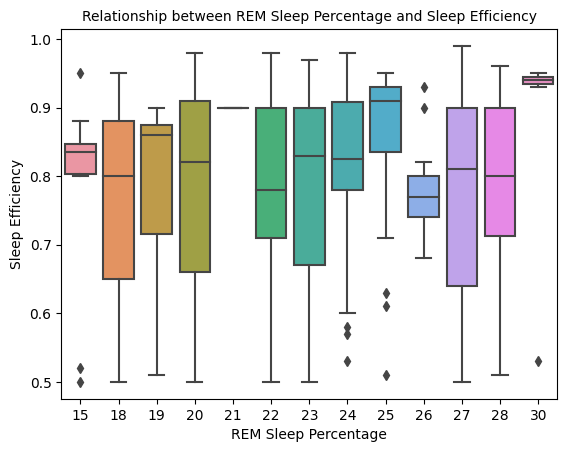

In [15]:
sb.boxplot(data=dataset,x="rem_sleep_percentage",y="sleep_efficiency")
plt.xlabel("REM Sleep Percentage",fontsize=10)
plt.ylabel("Sleep Efficiency",fontsize=10)
plt.title("Relationship between REM Sleep Percentage and Sleep Efficiency",fontsize=10)
plt.show()

## Relationship between Age and Sleep Efficiency

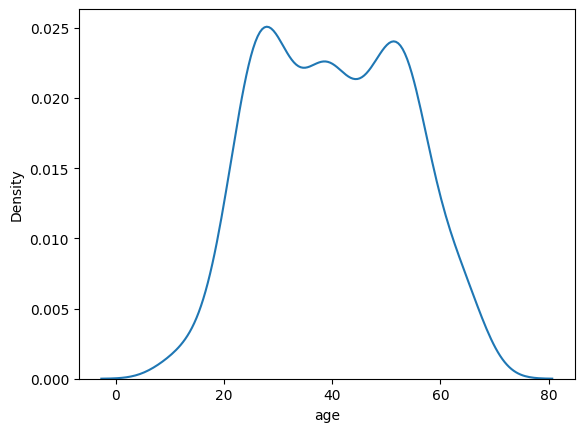

In [6]:
sb.kdeplot(dataset['age'])
plt.show()

age Correlation: 0.09835669021700891
sleep_duration Correlation: -0.027466558164158505


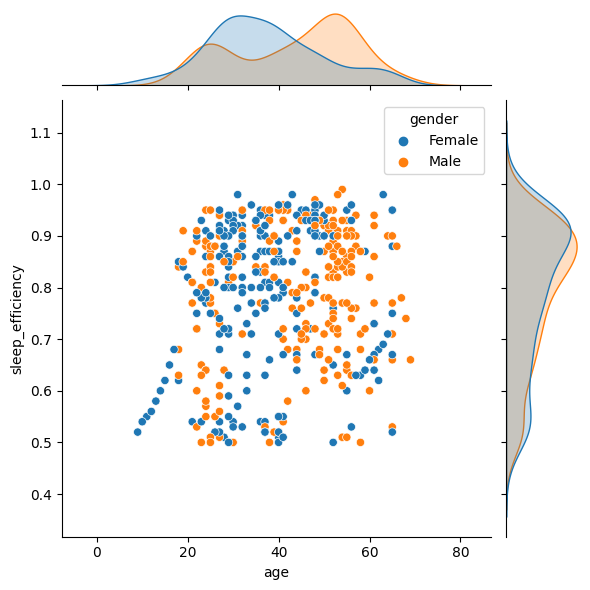

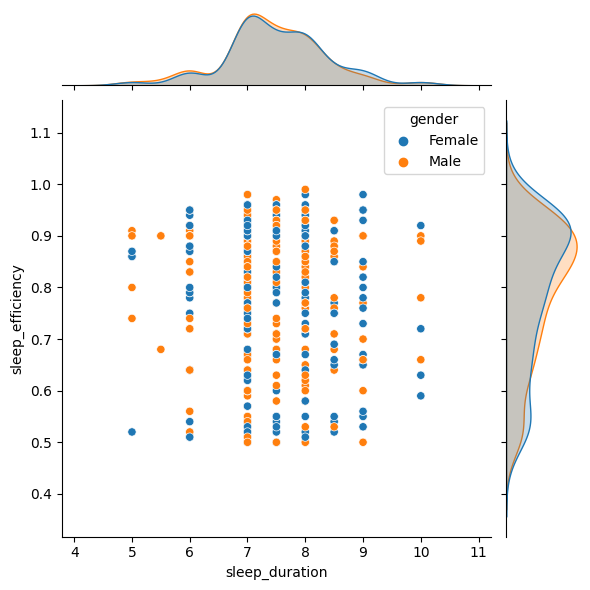

In [7]:
numerical_data = dataset.filter(['sleep_efficiency','age','sleep_duration','gender'])
for var in numerical_data:
        if var!= 'sleep_efficiency' and var!='gender':
            sb.jointplot(data = numerical_data, x = var, y='sleep_efficiency', hue='gender')
            print(var + " Correlation: " + str(numerical_data[var].corr(numerical_data['sleep_efficiency'])))

## Relationship between Smoking and Sleep Efficiency

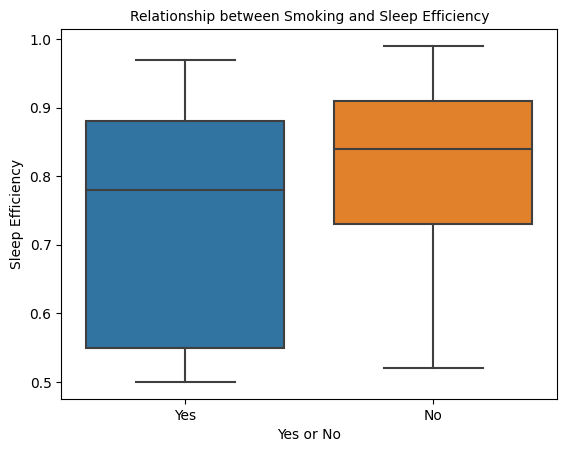

In [8]:
sb.boxplot(data=dataset,x="smoking_status",y="sleep_efficiency")
plt.xlabel("Yes or No",fontsize=10)
plt.ylabel("Sleep Efficiency",fontsize=10)
plt.title("Relationship between Smoking and Sleep Efficiency",fontsize=10)
plt.show()

From the box plot we can tell that non-smokers have higher sleep efficiency than non-smokers

## Relationship between Exercise Frequency and Sleep Efficiency

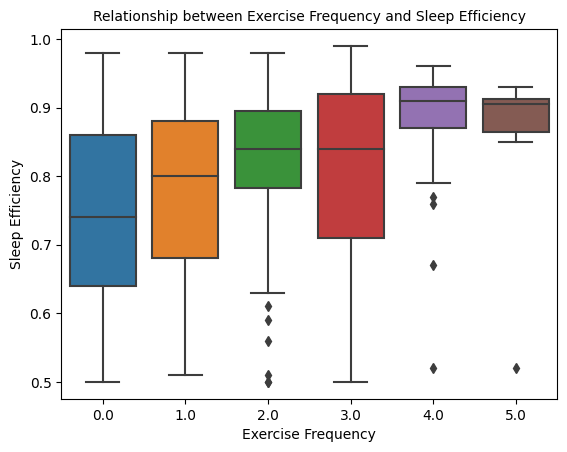

In [9]:
sb.boxplot(data=dataset,x="exercise_frequency",y="sleep_efficiency")
plt.xlabel("Exercise Frequency",fontsize=10)
plt.ylabel("Sleep Efficiency",fontsize=10)
plt.title("Relationship between Exercise Frequency and Sleep Efficiency",fontsize=10)
plt.show()

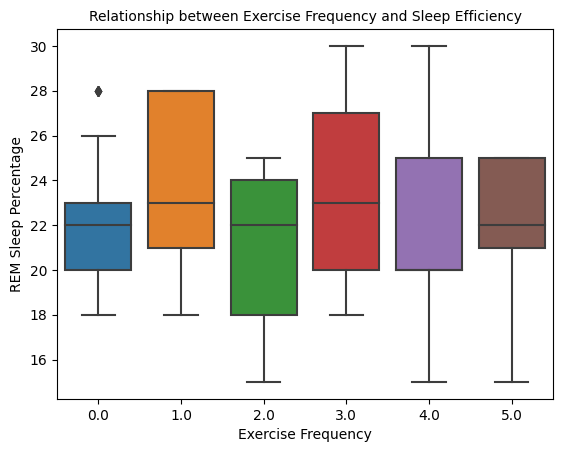

In [10]:
sb.boxplot(data=dataset,x="exercise_frequency",y="rem_sleep_percentage")
plt.xlabel("Exercise Frequency",fontsize=10)
plt.ylabel("REM Sleep Percentage",fontsize=10)
plt.title("Relationship between Exercise Frequency and Sleep Efficiency",fontsize=10)
plt.show()

From the data set, we can infer that sleep efficiency increases with exercise frequency

## Relationship between Alcohol Consumption and Sleep Efficiency

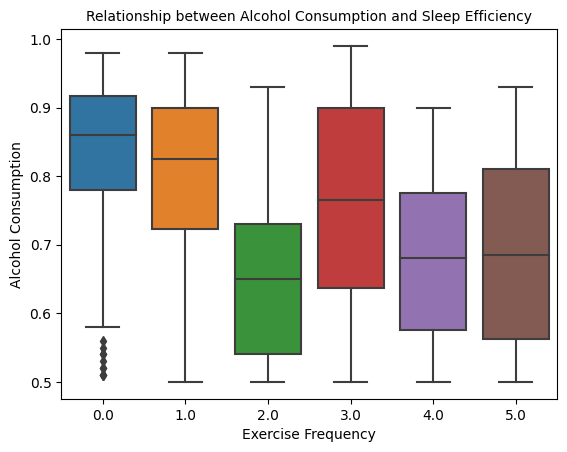

In [11]:
sb.boxplot(data=dataset,x="alcohol_consumption",y="sleep_efficiency")
plt.xlabel("Exercise Frequency",fontsize=10)
plt.ylabel("Alcohol Consumption",fontsize=10)
plt.title("Relationship between Alcohol Consumption and Sleep Efficiency",fontsize=10)
plt.show()

In [12]:
# Function for regression plotting
def regression_plot(predictor, response):
    
    # Split the Dataset into Train and Test
    X_train, X_test, y_train, y_test = train_test_split(predictor, response, test_size = 0.20)

    # Linear Regression using Train Data
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)

    # Coefficients of the Linear Regression line
    print('Intercept of Regression \t: b = ', linreg.intercept_)
    print('Coefficients of Regression \t: a = ', linreg.coef_)
    print()

    # Predict response values corresponding to predictor
    y_train_pred = linreg.predict(X_train)
    y_test_pred = linreg.predict(X_test)

    # Plot the regression line
    f = plt.figure(figsize=(24, 12))
    plt.scatter(y_train, y_train_pred)
    plt.plot(y_train, y_train, 'r-', linewidth = 3)

Intercept of Regression 	: b =  [0.80283163]
Coefficients of Regression 	: a =  [[-0.00130614]]



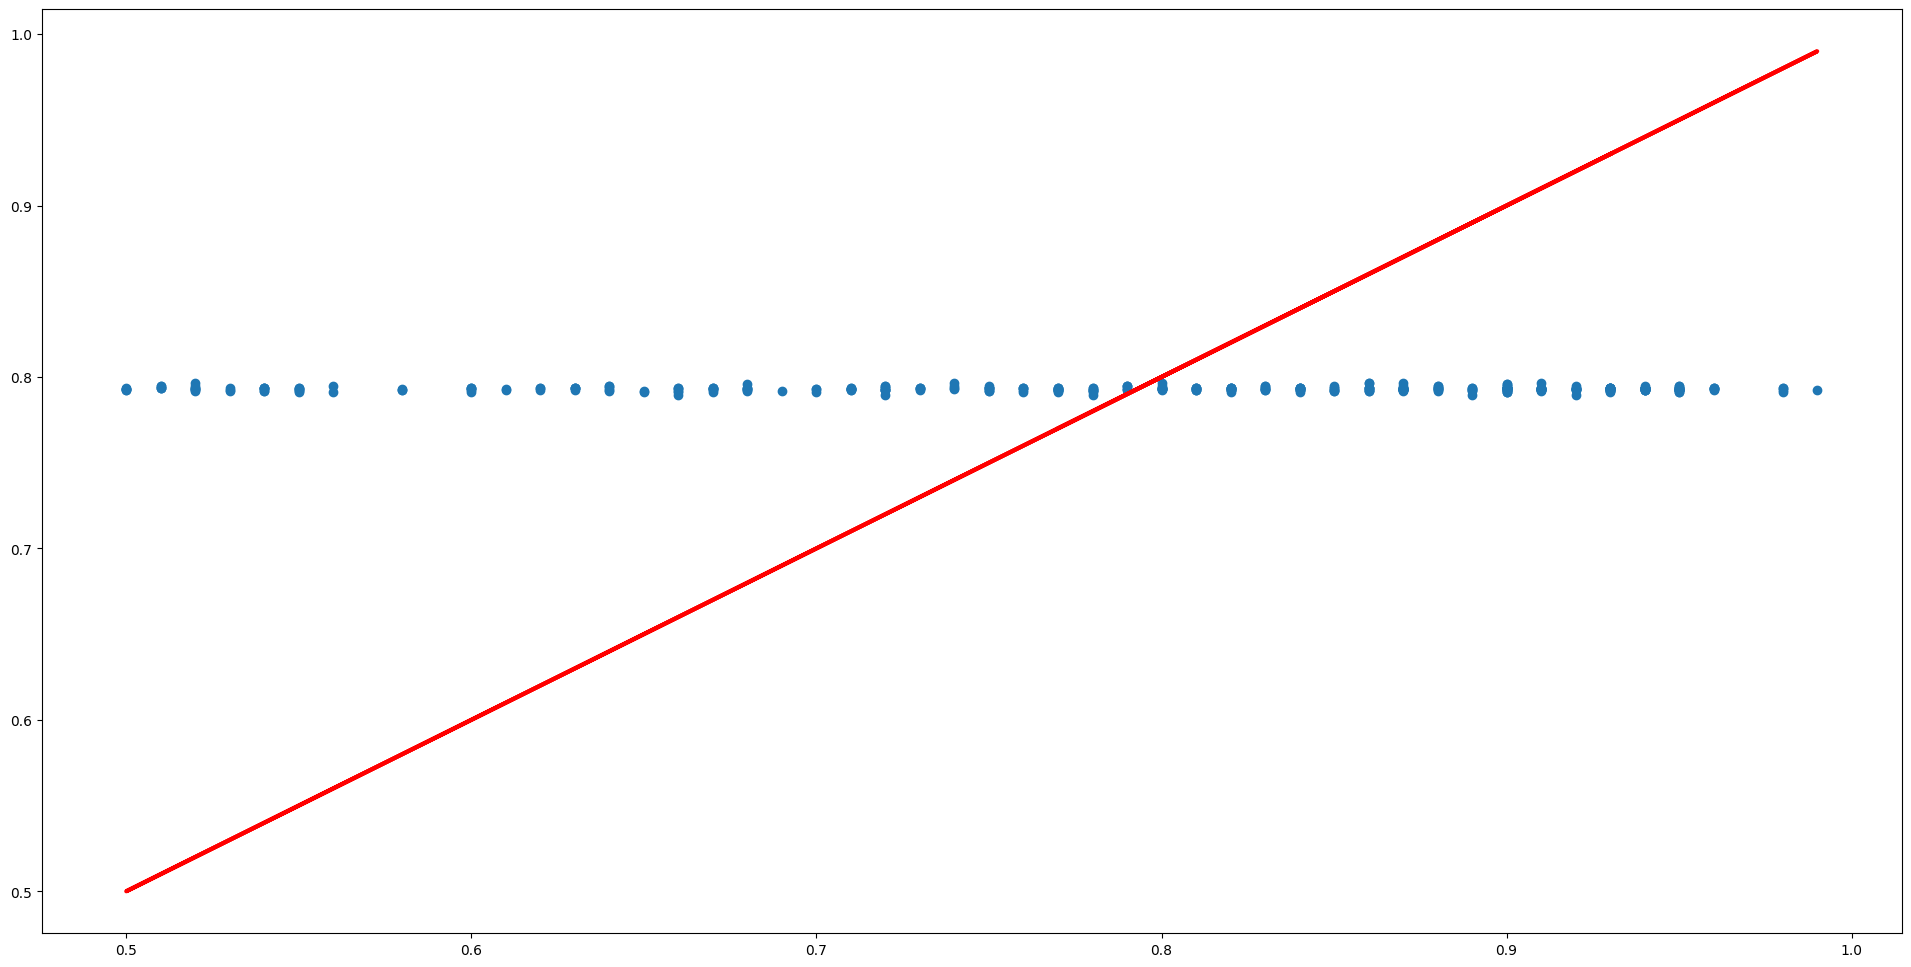

In [13]:
#Sleep Duration
sleepEfficiency = pd.DataFrame(dataset['sleep_efficiency'])
sleepDuration = pd.DataFrame(dataset['sleep_duration']) 
regression_plot(sleepDuration, sleepEfficiency)

In [14]:
#Sleep Duration
sleepEfficiency = pd.DataFrame(dataset['sleep_efficiency'])
lightSleep = pd.DataFrame(dataset['Light sleep percentage']) 
regression_plot(lightSleep, sleepEfficiency)

KeyError: 'Light sleep percentage'

In [ ]:
# Goodness of Fit Function
def goodness_of_fit(predictor, response, explained_variance = False):
    
    # Split the Dataset into Train and Test
    X_train, X_test, y_train, y_test = train_test_split(predictor, response, test_size = 0.20,random_state=0)
    
    # Linear Regression using Train Data
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    
    # Predict response values corresponding to predictor
    y_test_pred = linreg.predict(X_test)
    
    # Print the predictor and response variables
    print(predictor.columns[0] + " vs " + response.columns[0])
    
    # Print explained variance 
    if explained_variance == True:
        print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
    
    # Check the Goodness of Fit (on Test Data)
    print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
    print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(y_test, y_test_pred)))
    print()

In [ ]:
goodness_of_fit(sleepDuration, sleepEfficiency, explained_variance = True)


sleep_duration vs sleep_efficiency
Explained Variance (R^2) 	: 0.002573721357351788
Mean Squared Error (MSE) 	: 0.017715819982636404
Root Mean Squared Error (RMSE) 	: 0.13310078881297588

